# Computer Vision using OpenCV
* BGR channels: ranges from 0 to 255
* Grayscale: 1 channel, ranges from 0 to 255, 0 = Black, 255 = White
* !pip install opencv-python

# Load, Show, Save

In [1]:
import cv2
import numpy as np

img_path = 'pic1.jpg'

# Load image
img = cv2.imread(img_path,1) # 1 --> Color, 0 --> Grayscale
img_shape = img.shape

# Show image
cv2.imshow('image',img)
cv2.waitKey(0)

# Save image
# cv2.imwrite('saved image', img)

cv2.destroyAllWindows()

# Grayscale, Resize, Crop, 

In [11]:
# Convert to Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',gray_img)
cv2.waitKey(0)

# Resize image
resize_shape = (224,224)

resize_img_1 = cv2.resize(img, None,fx=0.5, fy=0.5)
cv2.imshow('image',resize_img_1)
cv2.waitKey(0)

resize_img_2 = cv2.resize(img, resize_shape)
cv2.imshow('image',resize_img_2)
cv2.waitKey(0)

# Crop image with indexing
cropped_img = img[10:100,10:100]
cv2.imshow('image',cropped_img)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Draw a Line, Circle, Rectangle

In [14]:
# Create Black image
black_img = np.zeros((224,224,3))
cv2.imshow('image',black_img)
cv2.waitKey(0)

# Create rectangle
rect = cv2.rectangle(black_img, (1,1),(100,100),(255,0,0),5)
cv2.imshow('image',rect)
cv2.waitKey(0)

# Create line
line = cv2.line(black_img, (1,1),(100,100),(255,0,0),5)
cv2.imshow('image',line)
cv2.waitKey(0)

# Create circle
circle = cv2.circle(black_img, (100,100), 10, (255,0,0),5)
cv2.imshow('image',circle)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Rotate, Flip, Change perspective

In [24]:
# Rotate image
rotate_img_matrix = cv2.getRotationMatrix2D((img.shape[0], img.shape[1]) , 45,0.5)
rotate_img = cv2.warpAffine(img, rotate_img_matrix, (img.shape[0], img.shape[1]))
cv2.imshow('image',rotate_img)
cv2.waitKey(0)

# Flip image
flip_img = cv2.flip(img,1)
cv2.imshow('image',flip_img)
cv2.waitKey(0)

# Change perspective
height = 100
width = 100

orig_img_coor = np.float32([[100,100], [200,100], [100,200], [200,200]])
new_img_coor = np.float32([[0,0], [width,0], [0,height], [width,height]])
perspective_img_matrix = cv2.getPerspectiveTransform(orig_img_coor, new_img_coor)
perspective_img = cv2.warpPerspective(img, perspective_img_matrix, (width,height) )
cv2.imshow('image',perspective_img)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Brightness and Darkness

In [20]:
intensity = 50
intensity_matrix = np.ones(img.shape, dtype='uint8') * intensity

bright_img = cv2.add(img,intensity_matrix)
cv2.imshow('image',bright_img)
cv2.waitKey(0)

dark_img = cv2.subtract(img,intensity_matrix)
cv2.imshow('image',dark_img)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Blur, Sharpening, Thresholding

In [52]:
kernel_size_5X5 = np.ones((5,5)) / 25
kernel_size_5X5_tuple = (5,5)

# Gaussian blur
blur_gaussian = cv2.GaussianBlur(img, kernel_size_5X5_tuple, 1)
cv2.imshow('image',blur_gaussian)
cv2.waitKey(0)

# filter2D blur
blur_filter2D = cv2.filter2D(img, -1, kernel_size_5X5)
cv2.imshow('image',blur_filter2D)
cv2.waitKey(0)

# Sharpening kernel
sharp_filter = np.array([[-1,-1,-1],[-1,10,-1],[-1,-1,-1]])
# Sharp image
sharp_img = cv2.filter2D(img,-1, sharp_filter)
cv2.imshow('image', sharp_img)
cv2.waitKey(0)

# Check out cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC 
# Values below 100 set to 0 (black), Values above 100 set to 255 (white)
ret, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
cv2.imshow('image', threshold_img)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Morphological Transformations
* Erosion: Background erodes
* Dilation: Background dilates
* Opening = Erosion >>> Dilation
* Closing = Dilation >>> Erosion

In [59]:
kernel_size_5X5 = np.ones((5,5)) / 25

# Erosion
erosion_img = cv2.erode(img, kernel_size_5X5)
cv2.imshow('image', erosion_img)
cv2.waitKey(0)

# Dilation
dilation_img = cv2.dilate(img,kernel_size_5X5)
cv2.imshow('image', dilation_img)
cv2.waitKey(0)

# Opening operation for noise removal
opening_operation = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_size_5X5)
cv2.imshow('image', opening_operation)
cv2.waitKey(0)


# Closing operation for noise removal
closing_operation = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_size_5X5)
cv2.imshow('image', closing_operation)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Edge Detection
* Lapacian, Canny, Sobel

In [60]:
# Canny Edge Detection
canny_edge_img = cv2.Canny(img, 10,100)
cv2.imshow('image', canny_edge_img)
cv2.waitKey(0)

# Laplacian Edge Detection
laplacian_edge_img = cv2.Laplacian(img, cv2.CV_64F)
cv2.imshow('image', laplacian_edge_img)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Blob Detection

In [6]:
blob_detector_object = cv2.SimpleBlobDetector_create()
keypoint_info = blob_detector_object.detect(img)
blank_img = np.zeros((1,1))
blob_detector = cv2.drawKeypoints(img,keypoint_info, np.array([]), 
                                  (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('image', blob_detector)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Line Detection
* Probabilistic Hough Lines

In [26]:
# grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',gray_img)
cv2.waitKey(0)

# detect canny edges
canny_edge_img = cv2.Canny(gray_img, 10,100)
cv2.imshow('image', canny_edge_img)
cv2.waitKey(0)

# Probabilistic Hough Lines
line_info = cv2.HoughLinesP(canny_edge_img, 1, np.pi/180, 250, 110, 10)

while line_info is True:
    for i in line_info:
        for x1,y1,x2,y2 in i:
            cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 2)

cv2.imshow('image', gray_img)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Contour Detection, Approximating contours and Convex Hull

In [37]:
img_copy = img.copy()
# grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',gray_img)
cv2.waitKey(0)

# detect canny edges
canny_edge_img = cv2.Canny(gray_img, 10,100)
cv2.imshow('image', canny_edge_img)
cv2.waitKey(0)

# Contour detection
contours, hierarchy = cv2.findContours(canny_edge_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour_img = cv2.drawContours(img_copy, contours,-1,(255,0,0), 4)
cv2.imshow('image', contour_img)
cv2.waitKey(0)

# Bounding rectangle around each contour
for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    bounding_rect_img = cv2.rectangle(img_copy, (x,y),(x+w,y+h), (0,0,255),1)
    cv2.imshow('image', bounding_rect_img)
cv2.waitKey(0)

# Contour Approximation through each detected contour
for i in contours:
    accuracy = 0.04 * cv2.arcLength(i, True)
    approx = cv2.approxPolyDP(i, accuracy, True)
    approx_contour_img = cv2.drawContours(img_copy, [approx],-1,(255,0,0), 4)
    cv2.imshow('image', approx_contour_img)
cv2.waitKey(0)

# Convex Hull:

# Sort the contours by area and remove the largest contour
n = len(contours) - 1
contours_sorted = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Convex Hull through each detected contour
for i in contours:
    hull = cv2.convexHull(i)
    hull_contour_img = cv2.drawContours(img_copy, [hull], -1, (255,0,0), 2)
    cv2.imshow('image', hull_contour_img)
cv2.waitKey(0)

# # Matching contour shapes: compare input image and target image

# # contours, hierarchy = cv2.findContours(input_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# # In input image, First largest contour is the boundary of the entire image
# second_largest_contour = contours[1]

# # In target image
# # contours, hierarchy = cv2.findContours(target_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


# for i in contours:
#     match = cv2.matchShapes(second_largest_contour, i, 1, 0)
#     if match < 0.2: 
#         closest_contour = i
#     else: 
#         closest_contour = [0]
        
# closest_contour_img = cv2.drawContours(img_copy, [closest_contour], -1, (255,0,0), 2)
# cv2.imshow('image', closest_contour_img)
# cv2.waitKey(0)

cv2.destroyAllWindows()

# Corner Detection
* Harris Corners are detected

In [64]:
# grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',gray_img)
cv2.waitKey(0)

img_copy = img.copy()
gray_img_copy = gray_img.copy()

harris_corner_info = cv2.cornerHarris(gray_img,3,3,0.05)

# Dilate the corner points to enlage them
kernel_size_5X5 = np.ones((5,5))/25
harris_corner_info = cv2.dilate(harris_corner_info,kernel_size_5X5)

img_copy[ harris_corner_info > 0.025 * harris_corner_info.max() ] = [255,0,0]
cv2.imshow('image', img_copy)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Face and Eye Detection using HAAR Cascade

In [5]:
# grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',gray_img)
cv2.waitKey(0)

img_copy = img.copy()
gray_img_copy = gray_img.copy()

# Load cascade classifier
classify_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classify_eye = cv2.CascadeClassifier('haarcascade_eye.xml')

def detect_face_and_eye(img_copy):
    
    # Region of interest of detected face
    face_roi = classify_face.detectMultiScale(gray_img_copy, 1.3, 5)

    if face_roi is False:
        print('No face detected')

    for fx,fy,fw,fh in face_roi:
        face_detected = cv2.rectangle(img_copy, (fx,fy), (fx+fw,fy+fh), (0,0,255), 2)

        gray_img_crop = gray_img_copy[fy:fy+fh, fx:fx+fw]
        img_crop = img_copy[fy:fy+fh ,fx:fx+fw]

        eye_roi = classify_eye.detectMultiScale(gray_img_crop)
        for ex,ey,ew,eh in eye_roi:
            eye_detected = cv2.rectangle(img_crop,(ex,ey), (ex+ew,ey+eh), (0,0,255), 2)
            
        img_crop = cv2.flip(img_crop,1)
        return img_crop

detect_face_and_eye(img_copy)

cv2.imshow('image', face_detected)
cv2.waitKey(0)

cv2.imshow('image', eye_detected)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Live Face and Eye Detection

In [8]:
cam = cv2.VideoCapture(0)
while True:
    ret, frame = cam.read()
    cv2.imshow('video', detect_face_and_eye(frame))
    
    # Press q to Quit window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

# Video Analysis using OpenCV

In [ ]:
# classify_pedestrian = cv2.CascadeClassifier('haarcascade_fullbody.xml')
# cam = cv2.VideoCapture('video1.mp4')

# # Loop through video
# while cam.isOpened():
#     ret, frame = cam.read()
#     frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
#     gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     pedestrian_roi = classify_pedestrian.detectMultiScale(gray_img, 1.3, 5)
    
#     for x,y,w,h in pedestrian_detected:
#         pedestrian_detected = cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
#         cv2.imshow('video', pedestrian_detected)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cam.release()
# cv2.destroyAllWindows()

# Deep Learning

* A tensor is a N dimensional array of data
* Rank 0 = scalar, Rank 1 = vector, Rank 2 = matrix 

# GPU Support

In [92]:
import tensorflow as tf
print('Tensorflow version is: ', tf.__version__)
print('Number of GPUs available: ',len(tf.config.experimental.list_physical_devices('GPU')) )
print('List of physical devices: ', tf.config.experimental.list_physical_devices())
print('Built with CUDA: ', tf.test.is_built_with_cuda())

# using GPU on code:
# with tf.device('/GPU:0'):
    #insert model building code here

Tensorflow version is:  2.4.1
Number of GPUs available:  0
List of physical devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Built with CUDA:  True


# Computer Vision using Deep Learning

# ANN (Artificial Neural Network)

* Activation function:
    * sigmoid has value between 0 and 1, 0 = neuron not firing, 1 = neuron firing 
    * tanh has value between -1 and 1
    * relu is used for hidden layers and sigmoid is used at output layer
    * relu helps make the model non-linear
    * drawback is vanishing gradients

In [12]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE

5

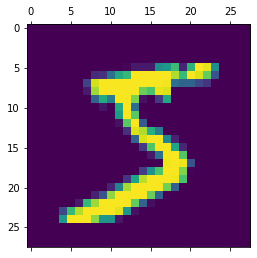

In [13]:
# Handling highly imbalanced data
    # Method: oversampling minority class using SMOTE (Synthetic Minority Oversampling Technique)
        # smote = SMOTE(sampling_strategy='minority')
        # x_sm, y_sm = smote.fit_sample(x, y)
        # from sklearn.model_selection import train_test_split
        # x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# import data
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

# normalize data for better accuracy of neural network
x_train = x_train / 255
x_test = x_test / 255

# visualize data
plt.matshow(x_train[0])
y_train[0]

# Sequential API

In [42]:
# make a neural network 
# flatten input into 1D array
# 28X28 node layer flattened and passed on to a 100 node layer ending at a 10 node layer (having digits 0 to 9 as probabilities) 
# Dropout regularization helps stop overfitting of model by dropping neurons randomly 
# compile, fit and evaluate

model_sequential = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='sigmoid')
])

model_sequential.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model_sequential.fit(x_train, y_train, epochs=1, callbacks=[tb_callback])

model_sequential.evaluate(x_test, y_test)

313/313 [==============================] - 0s 970us/step - loss: 0.1487 - accuracy: 0.9568


[0.14873278141021729, 0.9567999839782715]

# Functional API

In [43]:

inputs = keras.layers.Input(shape=(28,28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="sigmoid")(x)

model_functional = keras.Model(inputs=inputs, outputs=outputs)

model_functional.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model_functional.fit(x_train, y_train, epochs=1, callbacks=[tb_callback])

model_functional.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9670


[0.10774016380310059, 0.9670000076293945]

In [63]:
# Load tensorboard

# %load_ext tensorboard
# %tensorboard --logdir logs/fit

7

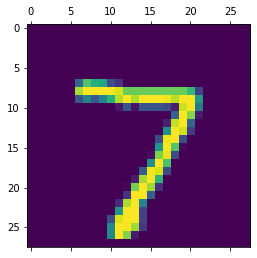

In [46]:
# store predictions
# digits 0 to 9 are as probabilities, argmax is used to give index of max probability of an array
y_predict = model_functional.predict(x_test)

y_predict_labels = [np.argmax(i) for i in y_predict]

plt.matshow(x_test[0])
y_predict_labels[0]

In [47]:
# confusuion matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    1,    2,    3,    2,    1,    3,    2],
       [   0, 1118,    3,    1,    0,    1,    5,    1,    6,    0],
       [   6,    0,  986,    8,    7,    1,    2,    8,   13,    1],
       [   0,    0,    6,  978,    0,    4,    0,    5,    7,   10],
       [   0,    0,    2,    0,  974,    0,    2,    0,    0,    4],
       [   3,    0,    0,    8,    3,  858,    7,    1,    5,    7],
       [   6,    3,    1,    1,    9,    7,  929,    0,    2,    0],
       [   1,    4,   10,    1,    5,    0,    0,  975,    3,   29],
       [   4,    0,    1,    6,   10,    5,    6,    5,  930,    7],
       [   3,    4,    0,    6,   28,    4,    0,    3,    5,  956]])>

In [49]:
# f1 score

from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_predict_labels))

# Layers of the model
model_functional.summary()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.94      0.99      0.96       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28)]          0         
__________________________

# Image Preprocessing

In [17]:
# image prepocessing using cv2
import cv2
import numpy as np

img_path = 'pic1.jpg'
resize_shape = (224, 224)
img = cv2.imread(img_path)

# Resize
resized_img = cv2.resize(img, resize_shape)
cv2.imshow('image',resized_img)
cv2.waitKey(0)

# Grayscale
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',gray_img)
cv2.waitKey(0)

# Normalize
resized_img = np.array(resized_img)/255

# Add an index 
# img.shape is (1,224,224,3) 1 is the index for better identification of the image
resized_img = resized_img[np.newaxis]

cv2.imshow('image',np.squeeze(resized_img))
cv2.waitKey(0)

cv2.destroyAllWindows()

# CNN (Convolutional Neural Network)

* Feature Extraction: Convolution + ReLU --> Pooling layer --> Flatten to 1D Array
* CNN Process: Feature extraction --> Classification(ANN)
* Convolution is multiplication of dataset matrix and filter matrix
* relu helps make the model non-linear
* Pooling layer is used to reduce size of matrix 
    * 2X2 filter finds maximum out of the 4 elements with stride = 1 
* Used mainly for image classification 
* CNN doesn't take care of rotation and scale hence data augmentation is used


In [52]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

'frog'

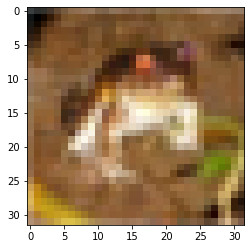

In [54]:
# import data
(x_train, y_train) , (x_test, y_test) = keras.datasets.cifar10.load_data()

# normalize data for better accuracy of neural network
x_train = x_train / 255
x_test = x_test / 255

# flatten y_train and y_test 
y_train = y_train.flatten()
y_test = y_test.flatten()

# visualize data
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.imshow(x_train[0])
classes[y_train[0]]

In [64]:
# Data Augmentation: Helps alter image dataset by flip, rotation, zoom to improve model accuracy

img_height = 32
img_width = 32

data_augmentation = keras.Sequential([
    keras.layers.Input(shape=(img_height, img_width, 3)),
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [57]:
# Convolution+relu --> MaxPooling --> Convolution+relu --> MaxPooling --> Flatten to 1D array --> Classification
# Convolution+relu: 
    # 32 filters of size 3X3 matrix convolute with input matrix of size 32 X 32 X 3 (3 is for BGR Channel)
    # Give inside Conv2D:
    # padding = 'same'
        # creates a boundary of 1 extra row and 1 extra column around the image (optional)
    # strides = (1,1)
        # It is how many cells does the filter move while convoluting around the input matrix (optional)
# Batch normalization: Automatically standardizes the inputs,  accelerates the training process
# MaxPooling: 2X2 matrix with stride = 1 finds max out of 4 elements and reduces matrix size 
# Dropout regularization helps stop overfitting of model by dropping neurons randomly 
# softmax activation function is popular in CNN for giving a probabilistic array output

# compile, fit, evaluate

cnn = keras.Sequential([
    
    data_augmentation,
    keras.layers.Input(shape= (32,32,3)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=1)

cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 10ms/step - loss: 1.3557 - accuracy: 0.5290


[1.3557493686676025, 0.5289999842643738]

'cat'

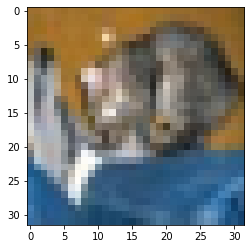

In [58]:
# store predictions
# image classes are stored as probabilities, argmax is used to give index of max probability of an array
y_predict = cnn.predict(x_test)

y_predict_labels = [np.argmax(i) for i in y_predict]

plt.imshow(x_test[0])
classes[y_predict_labels[0]]

# Save, Load or Delete Deep Learning Model

In [35]:
# model.save('tfmodel')
# model = load_model('tfmodel')
# del model

# Transfer Learning
* Inputs to a model are called feature vectors (binary)
* Outputs of a model are binary corresponding to classes which contain the classification or regressor value
* 3 Methods of implementation: 
    * Sequential API Pretrained Model from a tensorflow hub link    
    * Functional API Pretrained Model 

# Sequential API Pretrained Model from a tensorflow hub link

In [1]:
# image prepocessing using cv2
import cv2
import numpy as np

img_path = 'pic1.jpg'
resize_shape = (224, 224)
img = cv2.imread(img_path)
resized_img = cv2.resize(img, resize_shape)
resized_img = np.array(resized_img)/255

# Add an index 
# img.shape is (1,224,224,3) 1 is the index for better identification of the image
resized_img = resized_img[np.newaxis]

cv2.imshow('image',np.squeeze(resized_img))
cv2.waitKey(0)

cv2.destroyAllWindows()

In [2]:
# import libraries

import numpy as np
import matplotlib.pylab as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

# Pre-trained model from Tensorflow Hub
classifier = keras.Sequential([
    keras.layers.Input(shape=resize_shape+(3,)),
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")
])

In [3]:
# Predict image using pretrained model
result = classifier.predict(resized_img)
predicted_label_index = np.argmax(result)
keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

output = image_labels[predicted_label_index]

x_train = resized_img
# y_train = tf.constant([0])
y = { 
    'faces': 0,
    'eyes':  1
    }
y_list = []
y_list.append(y['faces'])
y_train = np.array(y_list)
y_train

array([0])

In [10]:
# Train your own model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = keras.Sequential([
    keras.layers.Input(shape=resize_shape+(3,)),
    hub.KerasLayer(feature_extractor_model, trainable=False)

])

model_tf_hub = keras.Sequential([
  pretrained_model_without_top_layer,
  keras.layers.Dense(2)
])

model_tf_hub.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_tf_hub.fit(x_train, y_train, epochs=1)

model_tf_hub.summary()

1/1 [==============================] - 4s 4s/step - loss: 2.3842e-07 - accuracy: 1.0000
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
# Predict input using newly trained model
newly_trained_result = model_tf_hub.predict(resized_img)

predicted_label_index = np.argmax(newly_trained_result)
predicted_label_index
# 0 is for 'faces' in the dictionary

0

# Functional API Pretrained Model 

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.datasets import mnist
# import tensorflow_hub as hub

# # ================================================ #
# #                  Pretrained-Model                #
# # ================================================ #

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
# x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# model = keras.models.load_model("pretrained")

# # Freeze all model layer weights
# model.trainable = False

# # Can also set trainable for specific layers
# for layer in model.layers:
#     # assert should be true because of one-liner above
#     assert layer.trainable == False
#     layer.trainable = False

# print(model.summary())  # for finding base input and output
# base_inputs = model.layers[0].input
# base_output = model.layers[-2].output
# output = layers.Dense(10)(base_output)
# new_model = keras.Model(base_inputs, output)

# # This model is actually identical to model we
# # loaded (this is just for demonstration and
# # and not something you would do in practice).
# print(new_model.summary())

# # As usual we do compile and fit, this time on new_model
# new_model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy"],
# )

# new_model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=2)

# # =================================================== #
# #                Pretrained Keras Model               #
# # =================================================== #

# # Random data for demonstration (3 examples w. 3 classes)
# x = tf.random.normal(shape=(3, 299, 299, 3))
# y = tf.constant([0, 1, 2])

# model = keras.applications.InceptionV3(include_top=True)
# print(model.summary())

# # for input you can also do model.input,
# # then for base_outputs you can obviously
# # choose other than simply removing the last one :)
# base_inputs = model.layers[0].input
# base_outputs = model.layers[-2].output
# classifier = layers.Dense(3)(base_outputs)
# new_model = keras.Model(inputs=base_inputs, outputs=classifier)
# new_model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy"],
# )

# print(new_model.summary())
# new_model.fit(x, y, epochs=15, verbose=2)

# # ================================================= #
# #                Pretrained Hub Model               #
# # ================================================= #

# # Random data for demonstration (3 examples w. 3 classes)
# x = tf.random.normal(shape=(3, 299, 299, 3))
# y = tf.constant([0, 1, 2])

# url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4"

# base_model = hub.KerasLayer(url, input_shape=(299, 299, 3))
# model = keras.Sequential(
#     [
#         base_model,
#         layers.Dense(128, activation="relu"),
#         layers.Dense(64, activation="relu"),
#         layers.Dense(10),
#     ]
# )

# model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy"],
# )

# model.fit(x, y, batch_size=32, epochs=15, verbose=2)